In [3]:
from neo.io import NeuroExplorerIO
import os
import neo
import elephant
import numpy as np
import pandas as pd
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from quantities import ms, s, Hz
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process
from elephant import neo_tools as nt
from viziphant.rasterplot import rasterplot
from viziphant.spade import plot_patterns
from viziphant.spade import plot_patterns_statistics
import seaborn as sns
import glob

In [4]:
datadirectory = '/Users/jonas/Documents/DATA/SPADE_bs10_wl50_bh/'

In [5]:
os.chdir(datadirectory)

In [6]:
filelist = glob.glob('*_SPADE_3.npy')

In [7]:
filelist

['HCxA_Chr2_light_5000_100light_1000stop_position40001_SPADE_3.npy']

In [8]:
namebase = filelist[0].split('_SPADE')[0]

In [9]:
namebase

'HCxA_Chr2_light_5000_100light_1000stop_position40001'

In [10]:
spadename = namebase + '_SPADE_3.npy'
spikename = namebase + '.h5_crossings_dict.npy'
firedicname = namebase + '.h5_firingrate_dict.npy'
burststarts = namebase + '.h5_crossings_dict.npyburststardic.npy'



In [11]:
burststarts

'HCxA_Chr2_light_5000_100light_1000stop_position40001.h5_crossings_dict.npyburststardic.npy'

In [12]:
spade =  np.load(spadename,allow_pickle='TRUE').item()

In [13]:
reloadedspikedic = np.load(spikename, allow_pickle='TRUE').item()
burststartdic=np.load(burststarts, allow_pickle='TRUE').item()
fireratedic=np.load(firedicname, allow_pickle='TRUE').item()

In [14]:
mea_array=np.empty((16,16,))
mea_array[:]=np.nan

In [15]:
mea_array

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, na

In [16]:
columnlist =['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','R']

In [17]:
df = pd.DataFrame(data=mea_array,columns=columnlist)

In [18]:
df.index+=1

In [19]:
df

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,R
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df1=df.copy()

In [21]:
def get_dict_values(df, dic):
    
    for i in df.columns:
        for j in range(0, 16):
            keystring = i+str(df.index[j])
            #print(keystring)
            if keystring in dic.keys():
                df.loc[df.index[j],i]=dic[keystring]
            
                
    
    return df

In [22]:
df_up = get_dict_values(df1, fireratedic)

In [23]:
df_up

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,R
1,NaN,0.149751,0.332779,0.000000,0.016639,0.000000,0.033278,0.000000,0.000000,0.033278,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,0.565724,2.778704,3.727124,0.016639,0.000000,0.016639,0.016639,0.000000,0.000000,0.000000,0.016639,0.000000,0.000000,0.000000,0.000000,0.016639
3,0.698836,6.938441,1.464227,0.316140,0.016639,0.000000,0.000000,0.016639,0.000000,0.000000,0.016639,0.016639,0.000000,0.000000,0.000000,0.016639
4,0.715475,0.299501,1.913479,0.016639,0.000000,0.000000,0.000000,0.016639,0.000000,0.000000,0.000000,0.016639,0.016639,0.000000,0.000000,0.033278
5,0.016639,0.549085,10.931788,0.033278,0.000000,0.000000,0.016639,0.016639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016639,0.016639
6,0.016639,4.076542,1.747089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016639,0.016639,0.000000
7,0.000000,1.480866,1.297838,0.000000,0.133112,0.000000,0.016639,0.000000,0.016639,0.000000,0.016639,0.000000,0.033278,0.000000,0.016639,0.016639
8,0.000000,0.415974,0.000000,0.000000,0.000000,0.016639,0.033278,0.033278,0.000000,0.000000,0.000000,0.000000,0.049917,0.000000,0.016639,0.000000
9,0.000000,0.033278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.599002,0.000000,0.000000,0.000000,0.000000,0.016639,0.000000,0.000000
10,0.000000,0.016639,0.000000,0.016639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016639,0.000000


In [24]:
df_up

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,R
1,NaN,0.149751,0.332779,0.000000,0.016639,0.000000,0.033278,0.000000,0.000000,0.033278,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,0.565724,2.778704,3.727124,0.016639,0.000000,0.016639,0.016639,0.000000,0.000000,0.000000,0.016639,0.000000,0.000000,0.000000,0.000000,0.016639
3,0.698836,6.938441,1.464227,0.316140,0.016639,0.000000,0.000000,0.016639,0.000000,0.000000,0.016639,0.016639,0.000000,0.000000,0.000000,0.016639
4,0.715475,0.299501,1.913479,0.016639,0.000000,0.000000,0.000000,0.016639,0.000000,0.000000,0.000000,0.016639,0.016639,0.000000,0.000000,0.033278
5,0.016639,0.549085,10.931788,0.033278,0.000000,0.000000,0.016639,0.016639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016639,0.016639
6,0.016639,4.076542,1.747089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016639,0.016639,0.000000
7,0.000000,1.480866,1.297838,0.000000,0.133112,0.000000,0.016639,0.000000,0.016639,0.000000,0.016639,0.000000,0.033278,0.000000,0.016639,0.016639
8,0.000000,0.415974,0.000000,0.000000,0.000000,0.016639,0.033278,0.033278,0.000000,0.000000,0.000000,0.000000,0.049917,0.000000,0.016639,0.000000
9,0.000000,0.033278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.599002,0.000000,0.000000,0.000000,0.000000,0.016639,0.000000,0.000000
10,0.000000,0.016639,0.000000,0.016639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016639,0.000000


In [25]:
def get_dict_len(df, dic):
    
    for i in df.columns:
        for j in range(0, 16):
            keystring = i+str(df.index[j])
            #print(keystring)
            if keystring in dic.keys():
                df.loc[df.index[j],i]=len(dic[keystring])
            
                
    
    return df

In [26]:
fireratedic['I9']

0.5990020625637688

# FIRING RATE MEA (hz)

<AxesSubplot:>

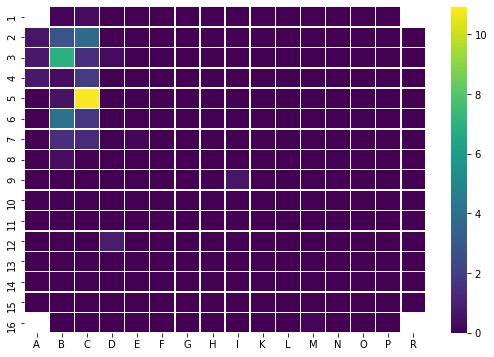

In [27]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_up, annot=False, linewidths=.5, ax=ax, cmap='viridis',)

In [28]:
df_norm_col=(df_up-df_up.mean().max())/df_up.mean().std()

In [29]:
#df_norm_col=(df_up-df_up.min().min())/(df_up.max().max()-df.min().min())

<AxesSubplot:>

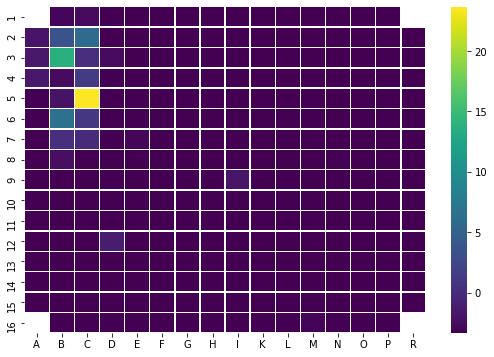

In [30]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_norm_col, annot=False, linewidths=.5, ax=ax, cmap='viridis',)

In [31]:
df_up.mean().max()

1.3404751018137115

# NUMBER OF BURSTSTARTS

In [32]:
df_burst=get_dict_len(df_up, burststartdic)

<AxesSubplot:>

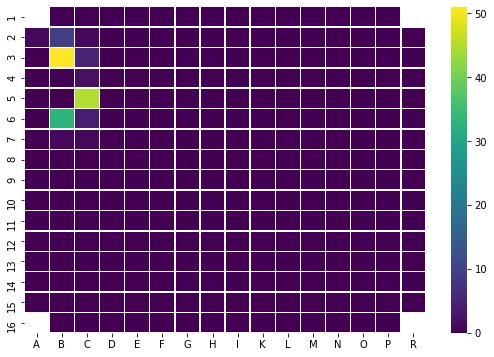

In [33]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_burst, annot=False, linewidths=.5, ax=ax, cmap='viridis')


# SPADE RESULTS

In [34]:
len(spade['patterns'])

17078

In [35]:
scale_factor_for_second = 1e-06
scale_factor_for_milisecond = 1e-03
tick=40

In [36]:
spikes = []

for key in reloadedspikedic:
    spikes.append(reloadedspikedic[key])
spikearray = np.sort(np.concatenate(spikes, axis = 0))
spikelist = list(spikearray)

spikearray_sec=spikearray*scale_factor_for_second*tick
recordinglength = round(spikearray_sec[-1]) + 1

In [37]:
def spikedic_to_neospiketrains(spikedic, recordinglength):
    
    

    spiketrains = [] 
    keylist_spiketrains = []
    for key in reloadedspikedic:
        key_array=np.asarray(reloadedspikedic[key])
        key_array_sec=key_array*1e-06*tick
        if len(key_array_sec)>2:
            st = neo.SpikeTrain(list(key_array_sec), units='sec', t_stop=recordinglength)
            spiketrains.append(st)
            keylist_spiketrains.append(key)
        
    return spiketrains, keylist_spiketrains

In [38]:
spiketrains, keylist_spiketrains = spikedic_to_neospiketrains(reloadedspikedic, recordinglength)

In [39]:
spiketrains

[SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain]

(<Figure size 720x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Patterns statistics'}, xlabel='Neuronal participation in patterns', ylabel='Count'>,
        <AxesSubplot:xlabel='Pattern occurrences', ylabel='Count'>,
        <AxesSubplot:xlabel='Pattern size', ylabel='Count'>,
        <AxesSubplot:xlabel='Lags (ms)', ylabel='Count'>], dtype=object))

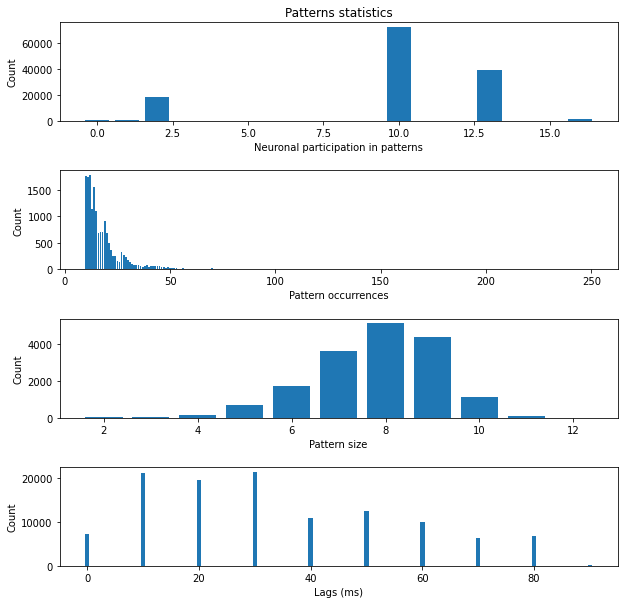

In [40]:
plot_patterns_statistics(spade['patterns'])

In [41]:
patterns = spade['patterns']

<AxesSubplot:xlabel='Time (s)', ylabel='Neuron'>

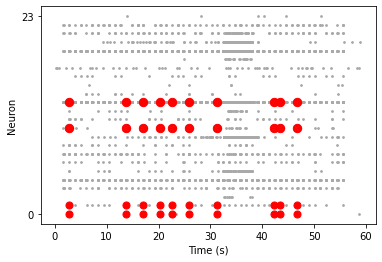

In [45]:
plot_patterns(spiketrains=spiketrains, patterns=patterns[10])


In [46]:
type(spikearray_sec)

numpy.ndarray

In [47]:
def make_pattern_dic(patterns):
    
    patterndic = {}
    for i in range(0, len(patterns)):
        key='P'+str(i)
        patterndic[key]=[(patterns[i]['neurons']),(patterns[i]['lags'])]
        
    
    return patterndic

In [48]:
patterndic = make_pattern_dic(patterns)

In [49]:
patterns[-1]

{'itemset': (650, 501),
 'windows_ids': (165,
  166,
  167,
  169,
  275,
  276,
  278,
  279,
  280,
  282,
  283,
  385,
  386,
  390,
  391,
  392,
  495,
  496,
  498,
  500,
  605,
  606,
  608,
  609,
  610,
  611,
  612,
  613,
  715,
  716,
  718,
  720,
  721,
  722,
  825,
  826,
  830,
  831,
  935,
  936,
  941,
  942,
  943,
  1046,
  1048,
  1053,
  1155,
  1156,
  1158,
  1160,
  1162,
  1265,
  1266,
  1271,
  1375,
  1378,
  1379,
  1381,
  1485,
  1486,
  1488,
  1490,
  1491,
  1492,
  1595,
  1596,
  1598,
  1600,
  1601,
  1705,
  1706,
  1708,
  1709,
  1711,
  1712,
  1815,
  1816,
  1820,
  1822,
  1925,
  1926,
  1928,
  1931,
  1934,
  2035,
  2036,
  2038,
  2041,
  2042,
  2146,
  2148,
  2150,
  2151,
  2152,
  2255,
  2256,
  2258,
  2260,
  2365,
  2366,
  2371,
  2476,
  2478,
  2481,
  2585,
  2586,
  2588,
  2589,
  2591,
  2592,
  2695,
  2696,
  2701,
  2805,
  2806,
  2808,
  2809,
  2811,
  2812,
  2915,
  2916,
  2918,
  2920,
  2921,
  2922,
  29

In [50]:
def patterns_to_df(df, patterndic, key):
    
    patterncount= (len(patterndic[key][0]))+1
    for i in patterndic[key][0]:
        keystring=keylist_spiketrains[i]
        i, j = keystring[0], int(keystring[1:])
        df.loc[j,i]=patterncount
        df=df.fillna(0)
        patterncount-=1
        
    
    return df

# PATTERNS SPATIAL

<AxesSubplot:>

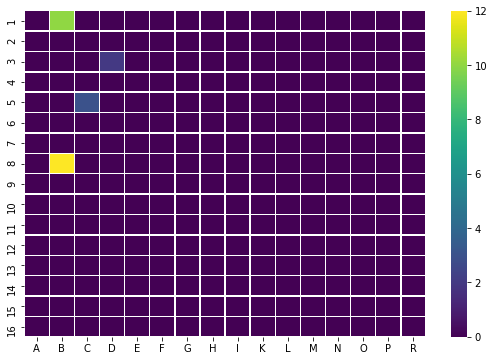

In [51]:
df4=df.copy()
df_Pattern4 = patterns_to_df(df4, patterndic, 'P593')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_Pattern4, annot=False, linewidths=.5, ax=ax, cmap='viridis')

In [52]:
patterndic

{'P0': [[2, 13, 10, 10, 2, 13, 10, 11, 10, 10],
  array([ 0.,  0., 10., 20., 20., 20., 50., 50., 70.]) * ms],
 'P1': [[2, 13, 10, 10, 2, 13, 10, 10, 11, 10],
  array([ 0.,  0., 10., 20., 20., 20., 40., 50., 50.]) * ms],
 'P2': [[2, 13, 10, 10, 13, 10, 11, 10, 10, 10],
  array([ 0.,  0., 10., 20., 20., 50., 50., 60., 70.]) * ms],
 'P3': [[2, 13, 10, 10, 13, 10, 10, 11, 10],
  array([ 0.,  0., 10., 20., 20., 30., 50., 50.]) * ms],
 'P4': [[13, 2, 13, 10, 10, 13, 11, 10, 10],
  array([10., 10., 10., 20., 30., 60., 70., 80.]) * ms],
 'P5': [[13, 2, 13, 10, 10, 13, 10, 11, 10],
  array([10., 10., 10., 20., 30., 30., 60., 80.]) * ms],
 'P6': [[10, 13, 10, 2, 13, 10, 2, 10, 13, 0],
  array([ 0., 10., 20., 20., 30., 40., 40., 50., 70.]) * ms],
 'P7': [[2, 13, 10, 2, 13, 10, 10, 10, 0, 10],
  array([ 0.,  0., 20., 20., 20., 30., 50., 70., 70.]) * ms],
 'P8': [[13, 10, 10, 2, 13, 10, 10, 10, 0, 10],
  array([ 0., 10., 20., 20., 30., 40., 60., 70., 70.]) * ms],
 'P9': [[13, 10, 10, 2, 10, 13, 10,

In [64]:
def get_channel_SPADE_participation(patterndic, keylist_spiketrains):
    
    '''
    Input: patterndic = Dic with keys=patternnumber, values=array of list, array[0]
            contains the participating channels of that pattern, array[1] contains the lags in between
            
    Output: a dictionary with key: channel names, e.g. A1, value: int given the number of appearances
            in any pattern 
    '''
    
    participation_dic={}
    for key in patterndic:
        for i in patterndic[key][0]:
            pd_key=keylist_spiketrains[i]
            if pd_key in participation_dic:
                participation_dic[pd_key]+=1
            else:
                participation_dic[pd_key]=1
    
    return participation_dic
        
        
    
    
    
    

In [65]:
pd_dic=get_channel_SPADE_participation(patterndic, keylist_spiketrains)

In [66]:
pd_dic

{'B1': 18712,
 'C5': 39471,
 'D3': 72776,
 'A3': 9,
 'N8': 532,
 'I9': 420,
 'B8': 1648,
 'C3': 7,
 'E7': 1}

In [62]:
participdic['A2']+=1

KeyError: 'A2'

In [63]:
participdic

{'A1': 2}

In [56]:
laglist = []

In [ ]:
for i in patterns:
    i['']

In [67]:
keylist_spiketrains[0]

'N8'

In [56]:
keylist_spiketrains[10]

'D3'

In [203]:
keylist_spiketrains.index('D7')

47

In [74]:
layer2_3list = ['A11', 'A12', 'A13', 'A14', 'A15', 'B12', 'B13', 'B14', 'B15', 'B16', 'C12', 'C13', 'C14', 'C15', 'C16', 'D13', 'D14', 'D15', 'D16', 'E13', 'E14', 'E15', 'E16', 'F13', 'F14', 'F15', 'F16', 'G13', 'G14', 'G15', 'G16', 'H13', 'H14', 'H15', 'H16', 'I13', 'I14', 'I15', 'I16', 'K13', 'K14', 'K15', 'K16', 'L13', 'L14', 'L15', 'L16', 'M13', 'M14', 'M15', 'M16', 'N13', 'N14', 'N15', 'N16', 'O13', 'O14', 'O15', 'O16', 'P12', 'P13', 'P14', 'P15', 'P16', 'R12', 'R13', 'R14', 'R15'] 

In [75]:
layer4_list = ['A10', 'B10', 'B11', 'C11', 'D11', 'D12', 'E11', 'E12', 'F11', 'F12', 'G11', 'G12', 'H11', 'H12', 'I11', 'I12', 'K11', 'K12', 'L11', 'L12', 'M11', 'M12', 'N11', 'O10', 'O11', 'P10', 'P11', 'R10', 'R11'] 

In [76]:
layer5_6list = ['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'O5', 'O6', 'O7', 'O8', 'O9', 'P5', 'P6', 'P7', 'P8', 'P9', 'R5', 'R6', 'R7', 'R8', 'R9']

In [77]:
white_matter_list = ['A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3', 'G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3', 'K1', 'K2', 'K3', 'L1', 'L2', 'L3', 'M1', 'M2', 'M3', 'M4', 'N1', 'N2', 'N3', 'N4', 'O1', 'O2', 'O3', 'O4', 'P1', 'P2', 'P3', 'P4', 'R2', 'R3', 'R4']

In [83]:
layer4_list.append('O12')

In [ ]:
columnlist =['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','R']

In [84]:
listdic ={} 

In [90]:
for i in white_matter_list:
    listdic[i]=9

In [167]:
def getlayer_firingrate(fireratedic, layerlist):
    
    sum_all = 0
    n=0
    std=0
    mean=0
    frlist = []
    for i in layerlist:
        sum_all +=fireratedic[i]
        frlist.append(fireratedic[i])
        n+=1
    mean = sum_all/n
    mean_nump=np.mean(frlist)
    std=np.std(frlist)
    
    return mean, mean_nump, std

In [180]:
mean, mean_nump, std = getlayer_firingrate(fireratedic, white_matter_list)

In [181]:
mean

1.0565978155038407

In [182]:
mean_nump

1.0565978155038405

In [183]:
std

2.1159404219949005